# Fraction of flagged tracks per cell analysis



## Nocodazole Treatment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import filedialog
from statannot import add_stat_annotation
import numpy as np


In [2]:
# Use file dialog to select CSV files for each condition
csv_files_1 = filedialog.askopenfilenames(
    title="Select CSV Files for No drug_2x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_2 = filedialog.askopenfilenames(
    title="Select CSV Files for Nocodazole_30 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_3 = filedialog.askopenfilenames(
    title="Select CSV Files for Nocodazole_60 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [3]:
def load_and_label(csv_files, label):
    dfs = []
    for file in csv_files:
        df = pd.read_csv(file)
        df['label'] = label
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

In [4]:
no_drug_df = load_and_label(csv_files_1, '- Noco')
noco_30mins_df = load_and_label(csv_files_2, '+ Noco, 30 mins')
noco_60mins_df = load_and_label(csv_files_3, '+ Noco, 60 mins')

results_df = pd.concat([no_drug_df, noco_30mins_df, noco_60mins_df], ignore_index=True)



In [5]:
desired_order = ['- Noco', '+ Noco, 30 mins', '+ Noco, 60 mins']
condition_counter = {label: results_df[results_df['label'] == label].shape[0] for label in desired_order}


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

- Noco v.s. + Noco, 30 mins: Welch's t-test independent samples with Bonferroni correction, P_val=2.226e-03 stat=3.811e+00
+ Noco, 30 mins v.s. + Noco, 60 mins: Welch's t-test independent samples with Bonferroni correction, P_val=3.108e-01 stat=1.689e+00
- Noco v.s. + Noco, 60 mins: Welch's t-test independent samples with Bonferroni correction, P_val=1.345e-03 stat=4.016e+00


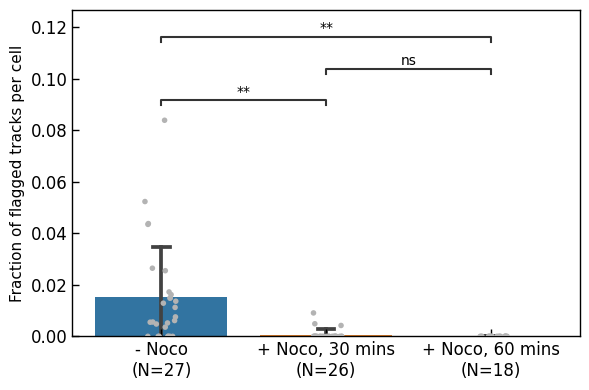

In [6]:
# Plotting
plt.figure(figsize=(6, 4))

# Bar plot with strip plot overlay, ensuring the order
ax = sns.barplot(data=results_df, x="label", y="fraction", ci='sd', capsize=0.1, estimator=np.mean, order=desired_order)
sns.stripplot(data=results_df, x="label", y="fraction", color="0.7", size=4, jitter=True, order=desired_order)

# Add statistical annotations
box_pairs = [
    ("- Noco", "+ Noco, 30 mins"), 
    ("- Noco", "+ Noco, 60 mins"), 
    ("+ Noco, 30 mins", "+ Noco, 60 mins")
]
add_stat_annotation(ax, data=results_df, x="label", y="fraction", box_pairs=box_pairs, test="t-test_welch",   
                    text_format="star", loc='inside', verbose=2, order=desired_order)

# Customize axis labels and layout
plt.ylabel("Fraction of flagged tracks per cell", fontsize=11)
plt.xlabel("")
plt.ylim(0, None)

# Customize x-tick labels with row counts
labels_with_counts = [f"{label}\n(N={count})" for label, count in condition_counter.items()]
ax.set_xticklabels(labels_with_counts, ha="center", fontsize=10)

# Customize spines
for spine in plt.gca().spines.values():
    spine.set_linewidth(1)

plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=12,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)

# Save and show the plot
plt.tight_layout()
plt.savefig("fraction_flagged_plot.png", format="png", bbox_inches="tight", dpi=300)
plt.show()

## Latrunculin A Treatment

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import filedialog
from statannot import add_stat_annotation
import numpy as np

In [8]:
# Use file dialog to select CSV files for each condition
csv_files_1 = filedialog.askopenfilenames(
    title="Select CSV Files for No drug_2x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_2 = filedialog.askopenfilenames(
    title="Select CSV Files for LatrunculinA_30 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_3 = filedialog.askopenfilenames(
    title="Select CSV Files for LatrunculinA_60 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [9]:
def load_and_label(csv_files, label):
    dfs = []
    for file in csv_files:
        df = pd.read_csv(file)
        df['label'] = label
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

In [10]:
no_drug_df = load_and_label(csv_files_1, '- LatA')
noco_30mins_df = load_and_label(csv_files_2, '+ LatA, 30 mins')
noco_60mins_df = load_and_label(csv_files_3, '+ LatA, 60 mins')

results_df = pd.concat([no_drug_df, noco_30mins_df, noco_60mins_df], ignore_index=True)

In [11]:
desired_order = ['- LatA', '+ LatA, 30 mins', '+ LatA, 60 mins']
condition_counter = {label: results_df[results_df['label'] == label].shape[0] for label in desired_order}


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

- LatA v.s. + LatA, 30 mins: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-3.379e-01
+ LatA, 30 mins v.s. + LatA, 60 mins: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-6.571e-01
- LatA v.s. + LatA, 60 mins: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-8.813e-01


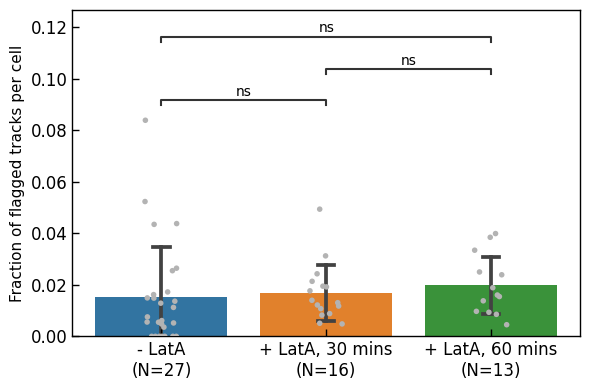

In [12]:
# Plotting
plt.figure(figsize=(6, 4))

# Bar plot with strip plot overlay, ensuring the order
ax = sns.barplot(data=results_df, x="label", y="fraction", ci='sd', capsize=0.1, estimator=np.mean, order=desired_order)
sns.stripplot(data=results_df, x="label", y="fraction", color="0.7", size=4, jitter=True, order=desired_order)

# Add statistical annotations
box_pairs = [
    ("- LatA", "+ LatA, 30 mins"), 
    ("- LatA", "+ LatA, 60 mins"), 
    ("+ LatA, 30 mins", "+ LatA, 60 mins")
]
add_stat_annotation(ax, data=results_df, x="label", y="fraction", box_pairs=box_pairs, test="t-test_welch",   
                    text_format="star", loc='inside', verbose=2, order=desired_order)

# Customize axis labels and layout
plt.ylabel("Fraction of flagged tracks per cell", fontsize=11)
plt.xlabel("")
plt.ylim(0, None)

# Customize x-tick labels with row counts
labels_with_counts = [f"{label}\n(N={count})" for label, count in condition_counter.items()]
ax.set_xticklabels(labels_with_counts, ha="center", fontsize=10)

# Customize spines
for spine in plt.gca().spines.values():
    spine.set_linewidth(1)

plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=12,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)

# Save and show the plot
plt.tight_layout()
plt.savefig("fraction_flagged_plot.png", format="png", bbox_inches="tight", dpi=300)
plt.show()